In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
name=['label','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13']
data=pd.read_csv('D:/圖形識別/HW1/wine.data',names=name)

In [3]:
df = data.iloc[:, 1:14]
df=np.mat(df)

In [4]:
def initoutputlayer(n , m , d):
    array = np.random.rand(d,n*m)
    return array

def normalize_x(x):
    N, D = x.shape
    for i in range(N):
        temp = np.sum(np.multiply(x[i], x[i]))
        x[i] /= np.sqrt(temp) 
    return x 
def normalize_weight(weight):
    for i in range(weight.shape[1]):
        t = np.sum(np.multiply(weight[:,i], weight[:,i]))
        weight[:, i] /= np.sqrt(t)
    return weight

In [5]:
def update_weight(dataset, time, T ,winner,n,m,Oweight):
    a=min(n,m)
    N = int(a-float(a)*time/T)
    for x, i in enumerate(winner):
        to_up = getneighbor(i[0], N,n,m)
        for j in range(N+1):
            e = np.power(np.e, -j)/(time+2)
            for w in to_up[j]:
                Oweight[:, w]=np.add(Oweight[:,w],e*(dataset[x,:]-Oweight[:,w]))
                
def getWinner(dataset,Iweight,T,b,n,m):
    c=0
    while T>c:
        train_x=dataset[np.random.choice(dataset.shape[0], b)]
        normalize_weight(Iweight)
        normalize_x(train_x)
        train_y = train_x.dot(Iweight)
        winner = np.argmax(train_y, axis=1).tolist()
        update_weight(train_x, c, T, winner,n,m,Iweight)
        c += 1
    print('Iweight shape:',Iweight[0].shape)
    print('Iweight:',Iweight[0])
    print('trainy len:',(train_y[0].shape))
    print('train y:',train_y[0])
    return Iweight
def distence(d1, d2,n,m):
    d1_n, d1_m = d1 // n, d1 % m
    d2_n, d2_m = d2 // n, d2 % m
    D11=np.abs(d1_n - d2_n)
    D22=np.abs(d1_m - d2_m)
    return D11, D22
def getneighbor(index,N,n,m):
    length = n*m
    a = [set() for i in range(N+1)]
    for i in range(length):
        dist_a, dist_b = distence(i, index,n,m)
        if dist_a <= N and dist_b <= N: 
            a[max(dist_a, dist_b)].add(i)
    return a
def result(x,Iweight):
    normalize_x(x)
    train_y = x.dot(Iweight)
    winner = np.argmax(train_y, axis=1).tolist()
    #print ('winner ',winner)
    return winner

In [6]:
def Kohonen(dataset,n,m,T,N_neibor):
    dataSet = normalize_x(dataset)
    Iweight = initoutputlayer(n,m,dataSet.shape[1])
    getWinner(df,Iweight,T,N_neibor,n,m)
    res=result(dataSet,Iweight)
    print('Iweight length:',len(Iweight))
    return res

In [7]:
res=Kohonen(df,3,1,30,3)
dataset_old = df.copy()
classes = {}
for i, win in enumerate(res):
    if not classes.get(win[0]):
        classes.setdefault(win[0], [i])
    else:
        classes[win[0]].append(i)

Iweight shape: (3,)
Iweight: [0.01941777 0.01941148 0.01940777]
trainy len: (1, 3)
train y: [[0.99998401 0.999984   0.99998401]]
Iweight length: 13


In [8]:
import pylab as pl
def draw(QQ):
    colValue = ['r', 'y', 'g']
    for i in range(len(QQ)):
        X = []
        Y = []
        for j in range(len(QQ[i])):
            X.append(QQ[i][j][0])
            Y.append(QQ[i][j][1])
        pl.scatter(X, Y, marker='x', color=colValue[i%len(colValue)], label=i)
    pl.legend(loc='upper right')
    pl.show()

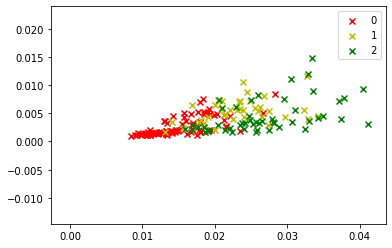

In [9]:
N = []
for i in classes.values():
    N.append(df[i].tolist())
draw(N)